# Cleaning - Kurt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn colorblind palette
sns.set_palette("colorblind")

In [2]:
df_total = pd.read_csv("../data/merged_data.csv")
df_total.shape

C:\Users\kurt-\AppData\Local\Temp\ipykernel_13872\4222567830.py:1: DtypeWarning: Columns (56,85,132,250,313,318,325,330,338,340,344,349,357,359,363,368,376,378,382,401,406,414,416,420,430,442,452,462,472,482,516,518,519,520,552,554) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv("../data/merged_data.csv")


(3314, 649)

In [4]:
df_total.columns

Index(['site', 'caseid', 'controltype', 'studysubjectid',
       'alteredmentalstatus', 'loc', 'ambulatory', 'focalneurofindings',
       'painneck', 'posmidnecktenderness',
       ...
       'xraysviewap_dup', 'xraysviewlt_dup', 'xraysviewom_dup',
       'xraysviewfe_dup', 'xraysviewsw_dup', 'xraysviewot_dup',
       'ctperformed_dup', 'mriperformed_dup', 'writtenordictatedconsult_dup',
       'operativereport_dup'],
      dtype='object', length=649)

In [28]:
df_total.motorgcs

0       NaN
1       6.0
2       NaN
3       NaN
4       6.0
       ... 
3309    NaN
3310    5.0
3311    6.0
3312    6.0
3313    NaN
Name: motorgcs, Length: 3314, dtype: float64

In [9]:
df = pd.read_csv("../data/CSpine/CSV datasets/analysisvariables.csv")

# Change all column names to lowercase
df.columns = df.columns.str.lower()

In [57]:
df_field = pd.read_csv("../data/CSpine/CSV datasets/clinicalpresentationfield.csv")
df_field.columns = df_field.columns.str.lower()

In [36]:
df_field.motorgcs

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3309    NaN
3310    6.0
3311    NaN
3312    NaN
3313    NaN
Name: motorgcs, Length: 3314, dtype: float64

In [32]:
# Load site data
df_site = pd.read_csv("../data/CSpine/CSV datasets/clinicalpresentationsite.csv")
df_site.columns = df_site.columns.str.lower()

In [37]:
df_site.motorgcs

0       1.0
1       6.0
2       6.0
3       NaN
4       NaN
       ... 
3309    6.0
3310    NaN
3311    NaN
3312    NaN
3313    NaN
Name: motorgcs, Length: 3314, dtype: float64

In [38]:
df_outside = pd.read_csv("../data/CSpine/CSV datasets/clinicalpresentationoutside.csv")
df_outside.columns = df_outside.columns.str.lower()

Analysis Variables:

In [170]:
df_analysis = pd.read_csv("../data/CSpine/CSV datasets/analysisvariables.csv")
df_analysis.columns = df_analysis.columns.str.lower()

In [172]:
df_analysis.highriskmvc.value_counts()

highriskmvc
0.0    2570
1.0     488
Name: count, dtype: int64

<Axes: >

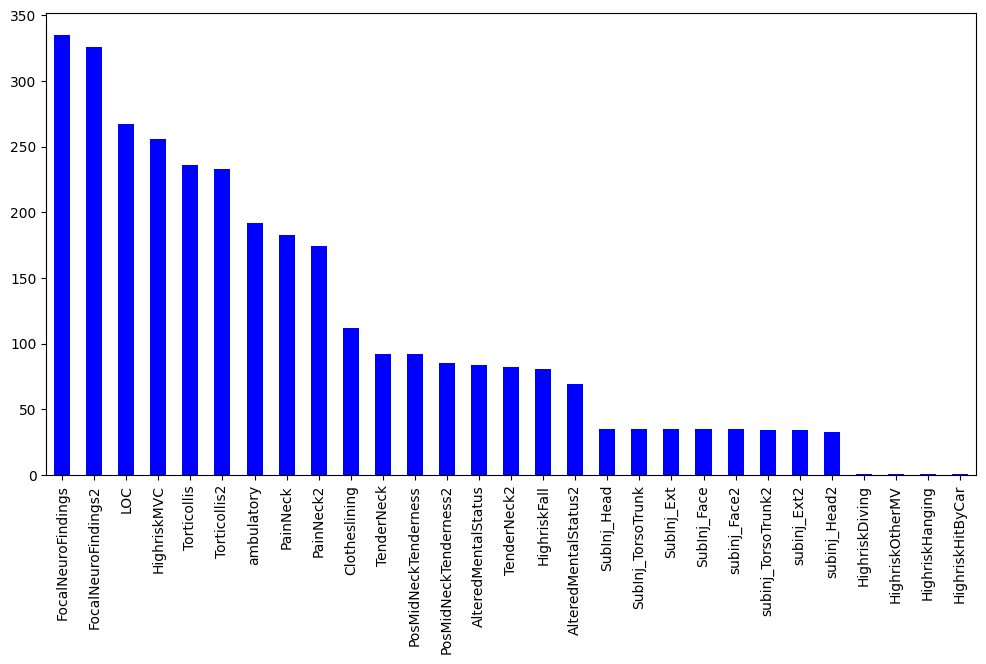

In [169]:
# Nan values
nan_values = df_analysis.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
nan_values.plot(kind="bar", color="blue", figsize=(12, 6))

I think this csv files are supposed to be with some clinicalpresentation variable, showing field, outside or onsite.

In [135]:
# Field
df_field = pd.read_csv("../data/CSpine/CSV datasets/clinicalpresentationfield.csv")
df_field.columns = df_field.columns.str.lower()
df_field = df_field[df_field["fielddocumentation"] == "EMS"]

<Axes: >

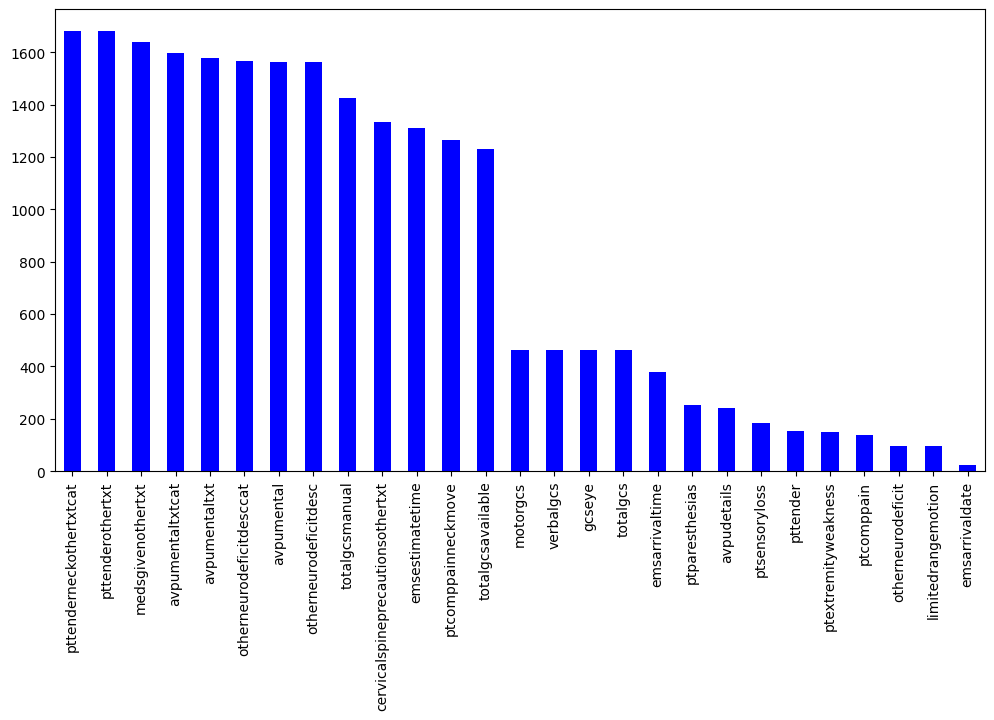

In [136]:
# Nan values
nan_values = df_field.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
nan_values.plot(kind="bar", color="blue", figsize=(12, 6))

In [137]:
df_field.pttenderneckothertxtcat.unique()


array([nan, 'YES'], dtype=object)

In [126]:
A = df_field["pttenderneckothertxtcat"] == "YES"

In [138]:
# Change "YES" to 1 and everything else to 0
df_field.loc[:, "pttenderneckothertxtcat"] = df_field["pttenderneckothertxtcat"].apply(lambda x: 1 if x == "YES" else 0)
df_field.loc[:, "otherneurodeficitdesccat"] = df_field["otherneurodeficitdesccat"].apply(lambda x: 1 if x == "YES" else 0)

# Change "ALTERED" to 1 and everything else to 0
df_field.loc[:, "avpumentaltxtcat"] = df_field["avpumentaltxtcat"].apply(lambda x: 1 if x == "ALTERED" else 0)

# If avpumental is U, change tthe column of avpudetails to U
df_field.loc[df_field["avpumental"] == "U", "avpudetails"] = "U"

# Change "OTH" to 1 and everything else to 0
df_field.loc[:, "avpumental"] = df_field["avpumental"].apply(lambda x: 1 if x == "OTH" else 0)

# Eliminate all columns with txt at end
df_field = df_field.loc[:, ~df_field.columns.str.endswith("txt")]
df_field = df_field.loc[:, ~df_field.columns.str.endswith("desc")]

# Since we are interested on loss of consciousness, we will join the manual and total GCS values
df_field.loc[df_field["totalgcsavailable"] =="Y", "totalgcs"] = df_field[df_field["totalgcsavailable"] =="Y"]["totalgcsmanual"]
df_field.drop(columns=["totalgcsmanual", "sectiongcsavailable", "totalgcsavailable", "gcseye", "verbalgcs", "motorgcs"], inplace=True)

<Axes: >

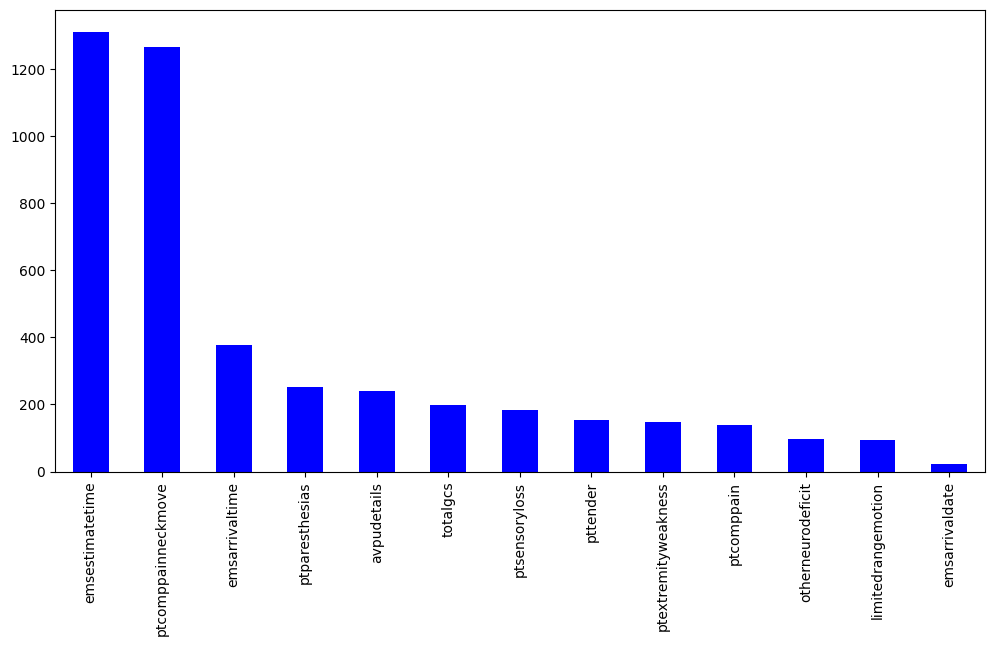

In [139]:
# Nan values
nan_values = df_field.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
nan_values.plot(kind="bar", color="blue", figsize=(12, 6))

In [98]:
df_field.otherneurodeficitdesccat.unique()

array([nan, 'NO', 'YES'], dtype=object)

Outside

In [164]:
df_outside = pd.read_csv("../data/CSpine/CSV datasets/clinicalpresentationoutside.csv")
df_outside.columns = df_outside.columns.str.lower()
df_outside = df_outside[df_outside["eddocumentation"] == "ED"]

<Axes: >

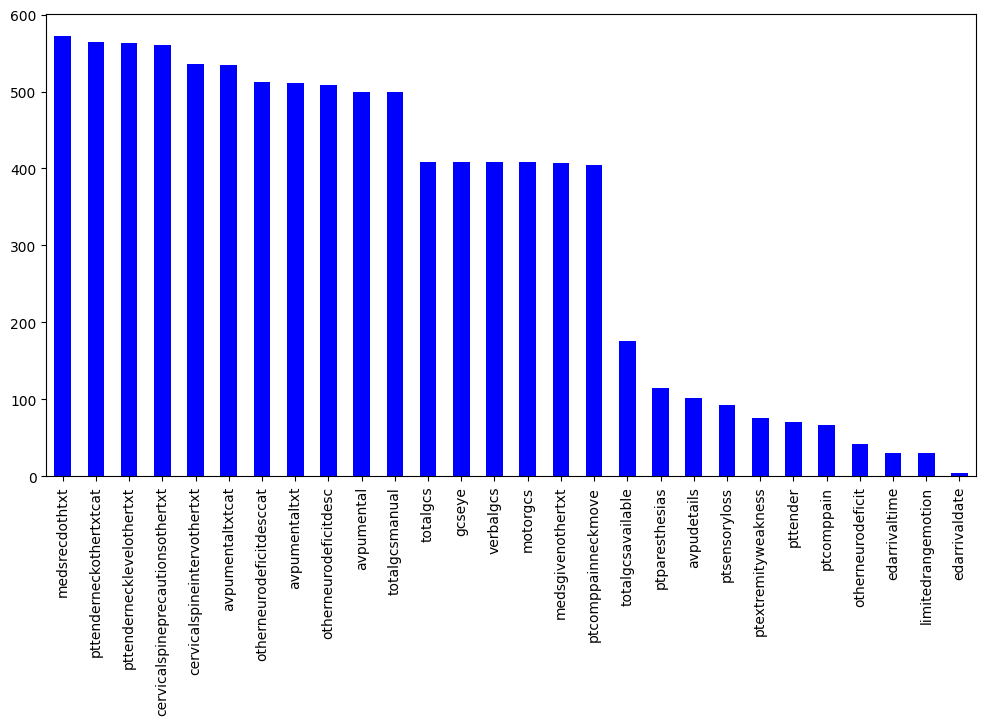

In [165]:
# Nan values
nan_values = df_outside.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
nan_values.plot(kind="bar", color="blue", figsize=(12, 6))

In [166]:
# Cleaning

# Change "YES" to 1 and everything else to 0
df_outside.loc[:, "pttenderneckothertxtcat"] = df_outside["pttenderneckothertxtcat"].apply(lambda x: 1 if x == "YES" else 0)
df_outside.loc[:, "otherneurodeficitdesccat"] = df_outside["otherneurodeficitdesccat"].apply(lambda x: 1 if x == "YES" else 0)

# Change "ALTERED" to 1 and everything else to 0
df_outside.loc[:, "avpumentaltxtcat"] = df_outside["avpumentaltxtcat"].apply(lambda x: 1 if x == "ALTERED" else 0)

# If avpumental is U, change tthe column of avpudetails to U
df_outside.loc[df_outside["avpumental"] == "U", "avpudetails"] = "U"

# Change "OTH" to 1 and everything else to 0
df_outside.loc[:, "avpumental"] = df_outside["avpumental"].apply(lambda x: 1 if x == "OTH" else 0)


# Eliminate all columns with txt at end
df_outside = df_outside.loc[:, ~df_outside.columns.str.endswith("txt")]
df_outside = df_outside.loc[:, ~df_outside.columns.str.endswith("desc")]

# Since we are interested on loss of consciousness, we will join the manual and total GCS values
df_outside.loc[df_outside["totalgcsavailable"] =="Y", "totalgcs"] = df_outside[df_outside["totalgcsavailable"] =="Y"]["totalgcsmanual"]
df_outside.drop(columns=["totalgcsmanual", "sectiongcsavailable", "totalgcsavailable", "gcseye", "verbalgcs", "motorgcs"], inplace=True)

<Axes: >

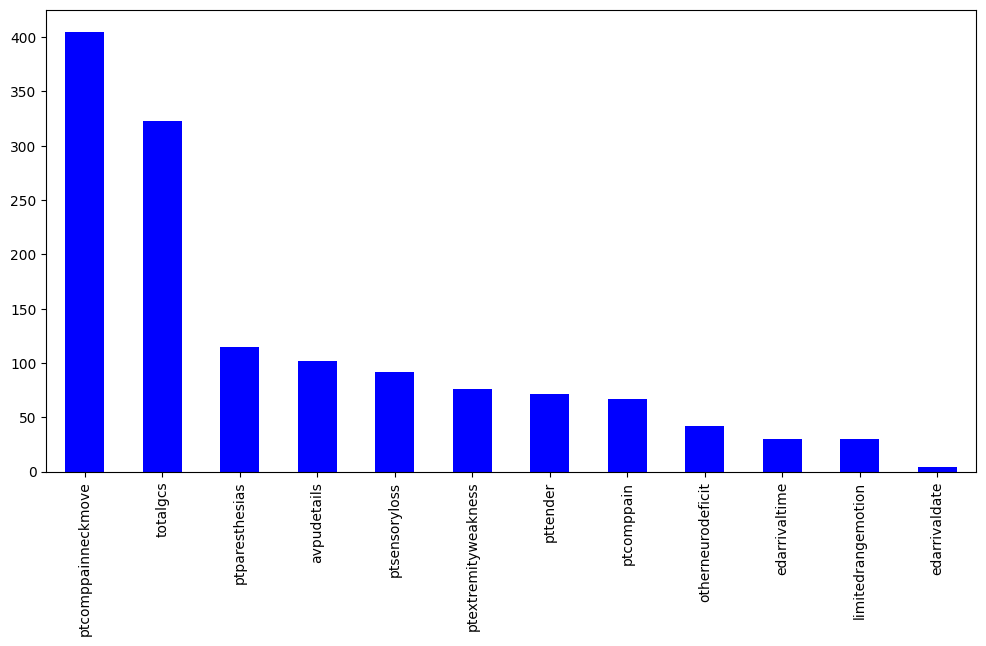

In [167]:
# Nan values
nan_values = df_outside.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values = nan_values.sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
nan_values.plot(kind="bar", color="blue", figsize=(12, 6))